##### Load Packages

In [1]:
!pip install dtale

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [45]:
# 1. Data Loading
train = pd.read_csv('train_v9rqX0R.csv')
test = pd.read_csv('test_AbJTz2l.csv')
submission = pd.read_csv('sample_submission_8RXa3c6.csv')

In [46]:
# 2. Initial Data Exploration
print("Train data shape:", train.shape)
print("Test data shape:", test.shape)
print("\nTrain data info:")
print(train.info())

print("\nTest data info:")
print(test.info())

print("\nMissing values in train data:")
print(train.isnull().sum())

print("\nMissing values in test data:")
print(test.isnull().sum())

Train data shape: (8523, 12)
Test data shape: (5681, 11)

Train data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), obje

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [48]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [49]:
print(train['Item_Weight'].describe())
print(test['Item_Weight'].describe())

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64
count    4705.000000
mean       12.695633
std         4.664849
min         4.555000
25%         8.645000
50%        12.500000
75%        16.700000
max        21.350000
Name: Item_Weight, dtype: float64


Item Weight Variance - Original: 21.56168825983637
Item Weight Variance - Mean: 17.860121735060453
Item Weight Variance - Median: 17.869561454073366


<Axes: >

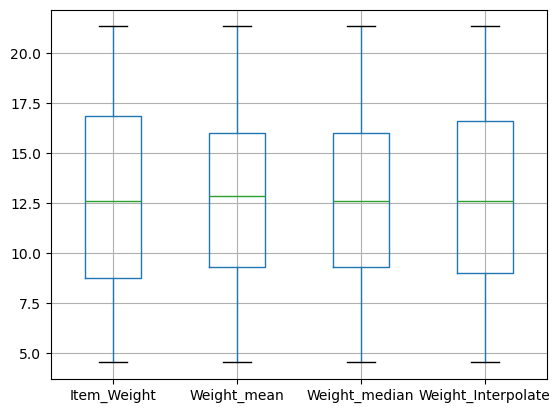

In [50]:
# 3.Handling Missing values in Item Size in training data
mean_wt=train['Item_Weight'].mean()
median_wt=train['Item_Weight'].median()
##Univariate Imputation
train['Weight_mean']=train['Item_Weight'].fillna(mean_wt)
train['Weight_median']=train['Item_Weight'].fillna(median_wt)

##Check for variance to choose the best method
print("Item Weight Variance - Original:", train['Item_Weight'].var())
print("Item Weight Variance - Mean:", train['Weight_mean'].var())
print("Item Weight Variance - Median:", train['Weight_median'].var())
## plot the item_weight in a line (original, mean, median, interpolation) - choose the best based on that for best interpolation
##Using Interpolate function - linear interpolation (missing values replaced based on neighbouring values)
train['Weight_Interpolate'] = train['Item_Weight'].interpolate(method ="linear")

train[['Item_Weight', 'Weight_mean', 'Weight_median','Weight_Interpolate']].boxplot()

Item Weight Variance - Original: 21.760812343231475
Item Weight Variance - Mean: 18.021630503971995
Item Weight Variance - Median: 18.027077062656364
Item Weight Variance - Interpolate: 19.990913374786285


<Axes: >

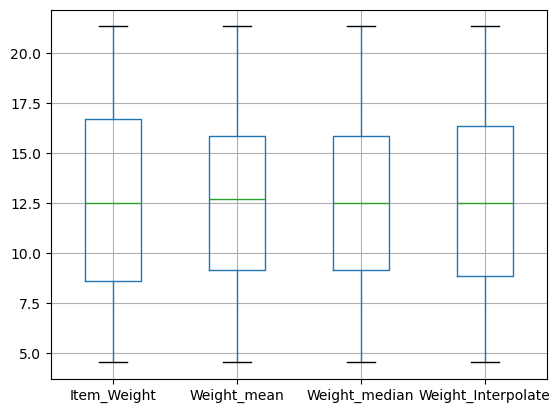

In [51]:
# 3.1Handling Missing values in Item Size in testing data
mean_wt_tst=test['Item_Weight'].mean()
median_wt_tst=test['Item_Weight'].median()
##Univariate Imputation
test['Weight_mean']=test['Item_Weight'].fillna(mean_wt_tst)
test['Weight_median']=test['Item_Weight'].fillna(median_wt_tst)

##Check for variance to choose the best method
print("Item Weight Variance - Original:", test['Item_Weight'].var())
print("Item Weight Variance - Mean:", test['Weight_mean'].var())
print("Item Weight Variance - Median:", test['Weight_median'].var())

## plot the item_weight in a line (original, mean, median, interpolation) - choose the best based on that for best interpolation
##Using Interpolate function - linear interpolation (missing values replaced based on neighbouring values)
test['Weight_Interpolate'] = test['Item_Weight'].interpolate(method ="linear")
print("Item Weight Variance - Interpolate:", test['Weight_Interpolate'].var())
test[['Item_Weight', 'Weight_mean', 'Weight_median','Weight_Interpolate']].boxplot()

In [52]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Weight_mean                     0
Weight_median                   0
Weight_Interpolate              0
dtype: int64

In [56]:
train = train.drop(['Weight_mean','Weight_median','Item_Weight'],axis=1)
test = test.drop(['Weight_mean','Weight_median','Item_Weight'],axis=1)
print(train['Weight_Interpolate'].describe())

count    8523.000000
mean       12.831222
std         4.445074
min         4.555000
25%         9.000000
50%        12.600000
75%        16.600000
max        21.350000
Name: Weight_Interpolate, dtype: float64


In [57]:
train['Outlet_Size']  #it is a categorical value

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [58]:
train['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [59]:
train['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [60]:
## 4. Handle Missing Values -Outlet Size --Train Data
print(train['Outlet_Size'].value_counts())
print(train['Outlet_Type'].value_counts())
print(train['Outlet_Location_Type'].value_counts())

mode_store = train.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))
print(mode_store)

missing_values = train['Outlet_Size'].isnull()

train.loc[missing_values,'Outlet_Size'] = train.loc[missing_values,'Outlet_Type'].apply(lambda x :mode_store[x])

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64
Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [61]:
train.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Weight_Interpolate           0
dtype: int64

In [62]:
## 4.2 Handle Missing Values -Outlet Size --Test Data
print(test['Outlet_Size'].value_counts())
print(test['Outlet_Type'].value_counts())
print(test['Outlet_Location_Type'].value_counts())

mode_store = test.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))
print(mode_store)

missing_values = test['Outlet_Size'].isnull()

test.loc[missing_values,'Outlet_Size'] = test.loc[missing_values,'Outlet_Type'].apply(lambda x :mode_store[x])

Outlet_Size
Medium    1862
Small     1592
High       621
Name: count, dtype: int64
Outlet_Type
Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: count, dtype: int64
Outlet_Location_Type
Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: count, dtype: int64
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [63]:
# 5. Data Preprocessing and Feature Engineering
# Save identifiers for later
train_identifiers = train[['Item_Identifier', 'Outlet_Identifier']].copy()
test_identifiers = test[['Item_Identifier', 'Outlet_Identifier']].copy()

# Combine train and test for preprocessing
test['Item_Outlet_Sales'] = 0  # temporary column for test data
combined = pd.concat([train, test], axis=0)

In [64]:
# Feature Engineering
# 5.1 Extract item category from Item_Identifier
combined['Item_Category'] = combined['Item_Identifier'].str[:2]
combined['Item_Category'] = combined['Item_Category'].map({
    'FD': 'Food',
    'DR': 'Drinks',
    'NC': 'Non-Consumable'
})

In [66]:
# 5.2 Calculate outlet age
import datetime as dt
current_year = dt.datetime.today().year
print(current_year)
combined['Outlet_Years'] = current_year - combined['Outlet_Establishment_Year']

2025


In [67]:
# 5.3 Normalize Item_Fat_Content values
fat_content_map = {
    'Low Fat': 'Low Fat',
    'Regular': 'Regular',
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
}
combined['Item_Fat_Content'] = combined['Item_Fat_Content'].map(fat_content_map)

In [68]:
# 5.4 Item_Visibility - log transform to handle skewness
combined['Item_Visibility_Interpol'] = combined['Item_Visibility'].replace(0,np.nan).interpolate(method='linear')

In [97]:
# from sklearn.preprocessing import OrdinalEncoder

# combined_encoded = combined.copy()

# cat_cols = combined.select_dtypes(include=['object']).columns
# print("train cols:", cat_cols)
# for col in cat_cols:
#     oe = OrdinalEncoder()
#     combined_encoded[col] = oe.fit_transform(combined_encoded[[col]])
#     print(oe.categories_)

from sklearn.preprocessing import OrdinalEncoder
combined_encoded = combined.copy()

# Get categorical columns and exclude identifiers
cat_cols = combined.select_dtypes(include=['object']).columns
cat_cols_to_encode = [col for col in cat_cols if col not in ['Item_Identifier', 'Outlet_Identifier']]

print("Categorical columns to encode:", cat_cols_to_encode)

# Apply ordinal encoding only to non-identifier categorical columns
for col in cat_cols_to_encode:
    oe = OrdinalEncoder()
    combined_encoded[col] = oe.fit_transform(combined_encoded[[col]])
    print(f"Categories for {col}:")
    print(oe.categories_)

Categorical columns to encode: ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Category']
Categories for Item_Fat_Content:
[array(['Low Fat', 'Regular'], dtype=object)]
Categories for Item_Type:
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
Categories for Outlet_Size:
[array(['High', 'Medium', 'Small'], dtype=object)]
Categories for Outlet_Location_Type:
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
Categories for Outlet_Type:
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]
Categories for Item_Category:
[array(['Drinks', 'Food', 'Non-Consumable'], dtype=object)]


In [98]:
combined_encoded['Item_Identifier'].value_counts

<bound method IndexOpsMixin.value_counts of 0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
5676    FDB58
5677    FDD47
5678    NCO17
5679    FDJ26
5680    FDU37
Name: Item_Identifier, Length: 14204, dtype: object>

In [119]:
# 5. Split back into train and test
train_processed = combined_encoded[combined_encoded['Item_Outlet_Sales'] > 0].drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Item_Visibility'], axis=1)
test_processed = combined_encoded[combined_encoded['Item_Outlet_Sales'] == 0].drop(['Item_Outlet_Sales'], axis=1)
test_ids = test_processed['Item_Identifier']
test_outlets = test_processed['Outlet_Identifier']
test_processed = test_processed.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Item_Visibility'], axis=1)

In [120]:
test_processed.head()

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Weight_Interpolate,Item_Category,Outlet_Years,Item_Visibility_Interpol
0,0.0,13.0,107.8622,1.0,0.0,1.0,20.7500,1.0,26,0.007565
1,1.0,4.0,87.3198,2.0,1.0,1.0,8.3000,1.0,18,0.038428
2,0.0,11.0,241.7538,2.0,2.0,0.0,14.6000,2.0,27,0.099575
3,0.0,13.0,155.0340,2.0,1.0,1.0,7.3150,1.0,18,0.015388
4,1.0,4.0,234.2300,1.0,2.0,3.0,8.5575,1.0,40,0.118599


In [121]:
train_processed.head()

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Weight_Interpolate,Item_Category,Outlet_Years,Item_Visibility_Interpol
0,0.0,4.0,249.8092,1.0,0.0,1.0,3735.1380,9.30,1.0,26,0.016047
1,1.0,14.0,48.2692,1.0,2.0,2.0,443.4228,5.92,0.0,16,0.019278
2,0.0,10.0,141.6180,1.0,0.0,1.0,2097.2700,17.50,1.0,26,0.016760
3,1.0,6.0,182.0950,2.0,2.0,0.0,732.3800,19.20,1.0,27,0.015755
4,0.0,9.0,53.8614,0.0,2.0,1.0,994.7052,8.93,2.0,38,0.014751


In [122]:
# 6. Model Training
# Extract features and target
X = train_processed.drop('Item_Outlet_Sales', axis=1)
y = train_processed['Item_Outlet_Sales']

# Split data for validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=300, max_depth=10, min_samples_split=5, 
                                 min_samples_leaf=2, n_jobs=-1, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=300, n_jobs=-1, random_state=42)

In [123]:
# 7. Model Evaluation
# Predict on validation set
y_pred = rf_model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f"\nValidation RMSE: {rmse:.4f}")


Validation RMSE: 1037.5563


In [124]:
# Cross-validation score
cv_scores = cross_val_score(rf_model, X, y, scoring='neg_root_mean_squared_error', cv=5)
print(f"Cross-Validation RMSE: {-cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

Cross-Validation RMSE: 1096.5181 (±7.0550)



Top 10 Important Features:
                    Feature  Importance
2                  Item_MRP    0.508772
5               Outlet_Type    0.327759
8              Outlet_Years    0.053167
9  Item_Visibility_Interpol    0.044623
6        Weight_Interpolate    0.037081
1                 Item_Type    0.016794
7             Item_Category    0.003243
0          Item_Fat_Content    0.003231
4      Outlet_Location_Type    0.002840
3               Outlet_Size    0.002489


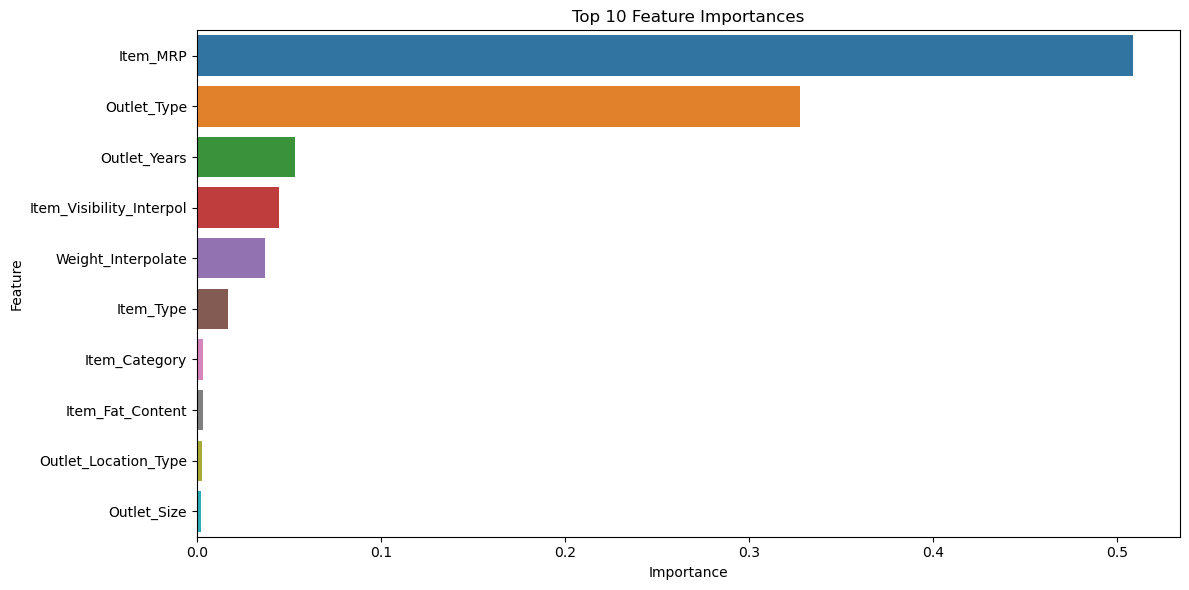

In [125]:
# 8. Feature Importance Analysis
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Important Features:")
print(feature_importance)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

In [126]:
# 9. Retrain on full training data
final_model = RandomForestRegressor(n_estimators=300, max_depth=10, min_samples_split=5, 
                                   min_samples_leaf=2, n_jobs=-1, random_state=42)
final_model.fit(X, y)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=300, n_jobs=-1, random_state=42)

In [127]:
# 10. Make predictions on test data
test_predictions = final_model.predict(test_processed)

In [128]:
# 11. Prepare submission file
submission = pd.DataFrame({
    'Item_Identifier': test_ids,
    'Outlet_Identifier': test_outlets,
    'Item_Outlet_Sales': test_predictions
})

In [129]:
# 12. Export submission to CSV
submission.to_csv('bigmart_sales_prediction4.csv', index=False)
print("\nSubmission file created successfully!")


Submission file created successfully!


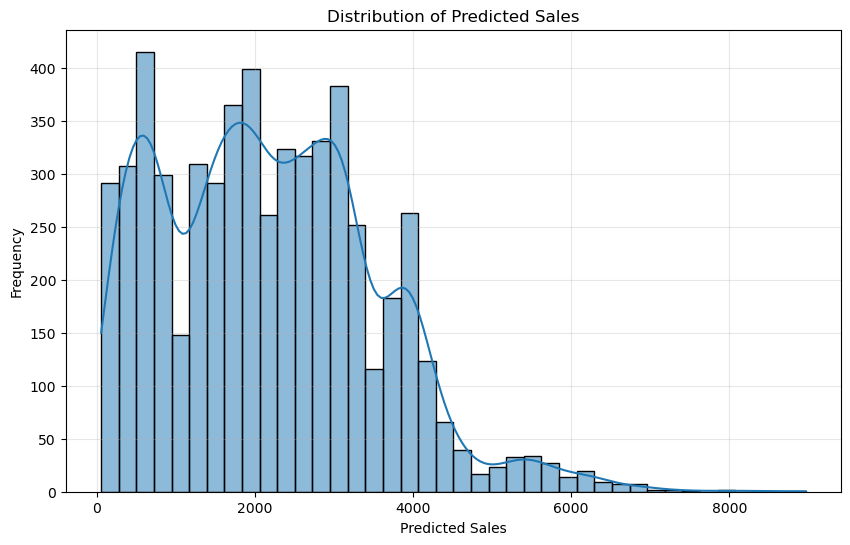

In [130]:
# 13. Additional Analysis: Distribution of predictions
plt.figure(figsize=(10, 6))
sns.histplot(test_predictions, kde=True)
plt.title('Distribution of Predicted Sales')
plt.xlabel('Predicted Sales')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

In [131]:
print("\nPrediction Summary Statistics:")
print(pd.Series(test_predictions).describe())


Prediction Summary Statistics:
count    5681.000000
mean     2189.216414
std      1349.156226
min        55.230908
25%      1083.339909
50%      2069.364841
75%      3089.700428
max      8964.626738
dtype: float64


In [133]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 653.6 kB/s eta 0:03:12
   ---------------------------------------- 0.4/124.9 MB 4.4 MB/s eta 0:00:29
   ---------------------------------------- 1.5/124.9 MB 10.9 MB/s eta 0:00:12
    --------------------------------------- 2.8/124.9 MB 14.6 MB/s eta 0:00:09
   - -------------------------------------- 4.2/124.9 MB 19.2 MB/s eta 0:00:07
   - -------------------------------------- 5.5/124.9 MB 20.7 MB/s eta 0:00:06
   -- ------------------------------------- 6.3/124.9 MB 20.2 MB/s eta 0:00:06
   -- ------------------------------------- 7.1/124.9 MB 19.7 MB/s eta 0:00:06
   -- ------------------------------------- 7.9/124.9 MB 20.2 MB/s eta 0:00:06
   -- ------------------------------------- 8.6/124.9 MB 19.7 MB/s eta 0:00:06
   -- ------------------------------------- 9.3/124.9 MB 19.9 MB/s e

In [136]:
from xgboost import XGBRFRegressor

##Initialize XGB
xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg,X_train, y_train,cv=5,scoring='r2')
print(scores.mean())

# train the model
xg.fit(X_train, y_train)

0.5928879638515019


XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=42, reg_alpha=None, ...)

In [137]:
# 7. Model Evaluation
# Predict on validation set
y_pred = xg.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f"\nValidation RMSE: {rmse:.4f}")


Validation RMSE: 1024.3107


In [138]:
# Cross-validation score
cv_scores = cross_val_score(xg, X, y, scoring='neg_root_mean_squared_error', cv=5)
print(f"Cross-Validation RMSE: {-cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

Cross-Validation RMSE: 1085.0373 (±9.1124)



Top 10 Important Features:
                    Feature  Importance
5               Outlet_Type    0.462899
3               Outlet_Size    0.205718
2                  Item_MRP    0.169818
8              Outlet_Years    0.139002
4      Outlet_Location_Type    0.007902
6        Weight_Interpolate    0.004772
9  Item_Visibility_Interpol    0.004012
1                 Item_Type    0.002768
7             Item_Category    0.001663
0          Item_Fat_Content    0.001447


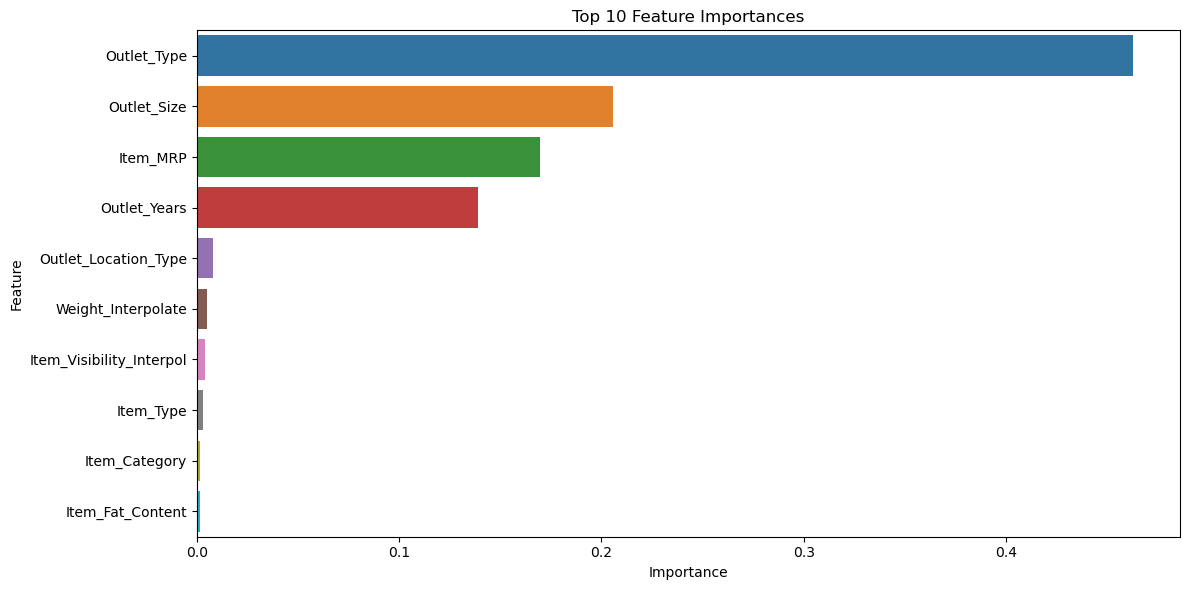

In [139]:
# 8. Feature Importance Analysis
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xg.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Important Features:")
print(feature_importance)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

In [140]:
# 9. Retrain on full training data
final_model_xg = XGBRFRegressor(n_estimators=100,random_state=42)
final_model_xg.fit(X, y)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=42, reg_alpha=None, ...)

In [141]:
# 10. Make predictions on test data
test_predictions = final_model_xg.predict(test_processed)

In [142]:
# 11. Prepare submission file
submission = pd.DataFrame({
    'Item_Identifier': test_ids,
    'Outlet_Identifier': test_outlets,
    'Item_Outlet_Sales': test_predictions
})
# 12. Export submission to CSV
submission.to_csv('bigmart_sales_prediction5.csv', index=False)
print("\nSubmission file created successfully!")


Submission file created successfully!
